- input activation is relu in case of binary or multiclass
- output activation is sigmoid in case of binary and softmax in case of multi


In [1]:
from sklearn.datasets import make_circles


n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [2]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [6]:
import pandas as pd
circles = pd.DataFrame({'X0':X[:,0], "X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


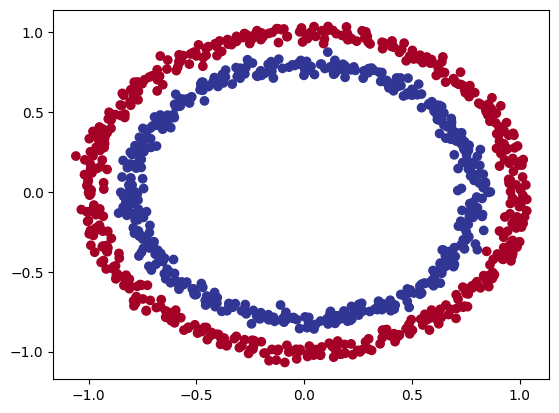

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [9]:
X.shape,y.shape

((1000, 2), (1000,))

In [10]:
import tensorflow as tf

In [15]:
X.dtype, y.dtype

(dtype('float64'), dtype('int64'))

In [16]:

tf.random.set_seed(42)


model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])


model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])


model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.5079 - accuracy: 0.4840
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.8810 - accuracy: 0.4990
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 3.9234 - accuracy: 0.5210
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 2.2645 - accuracy: 0.4990
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7527 - accuracy: 0.4990


lets train for longer

In [17]:
model_1.fit(X, y, epochs=200, verbose=0)

In [18]:
model_1.evaluate(X, y)


32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

lets add more layers as its still not performing quite well

In [20]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)

])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_2.fit(X, y, epochs=100, verbose=0)

In [21]:
model_2.evaluate(X, y)

32/32 [==============================] - 1s 6ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

Improving our model

In [23]:
tf.__version__

'2.15.0'

To improve our model, we can alter almost every part of the 3 steps we went through before.

Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
Compiling a model - you might want to choose a different optimization function (such as the Adam optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.
Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer).

In [24]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_3.fit(X, y, epochs=100, verbose=0)

In [25]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6993 - accuracy: 0.5130


[0.6993248462677002, 0.5130000114440918]

To visualize our model's predictions we're going to create a function plot_decision_boundary() which:

Takes in a trained model, features (X) and labels (y).
Creates a meshgrid of the different X values.
Makes predictions across the meshgrid.
Plots the predictions as well as a line between the different zones (where each unique class falls).

In [26]:
import numpy as np

def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 0].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)
  if (len(y_pred[0]) > 1):
    print("multiclass")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("binary")
    y_pred = np.round(y_pred).reshape(xx.shape)


  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 1s 3ms/step
binary


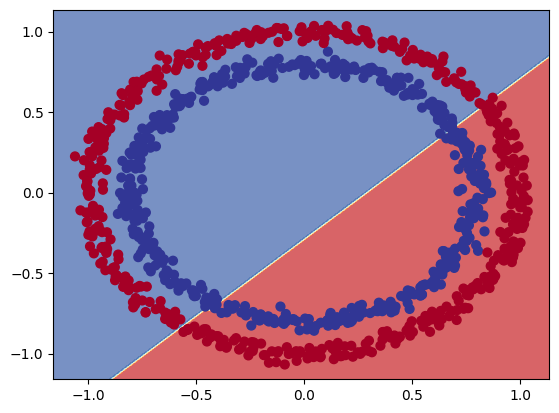

In [27]:
plot_decision_boundary(model=model_3, X=X, y=y)

In [31]:
# lets check our model for regression data

tf.random.set_seed(42)


X_regression = tf.range(0, 1000 ,5)
y_regression = tf.range(100, 1100, 5)


X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]


In [33]:
tf.random.set_seed(42)


model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])


model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])


model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 8ms/step - loss: 333.6958 - mae: 333.6958
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 211.9223 - mae: 211.9223
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 94.1238 - mae: 94.1238
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 57.9075 - mae: 57.9075
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 78.1976 - mae: 78.1976
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 57.0790 - mae: 57.0790
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 43.8444 - mae: 43.8444
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 46.7152 - mae: 46.7152
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 42.5137 - mae: 42.5137
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 43.3600 - mae: 43.3600
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 8ms/step


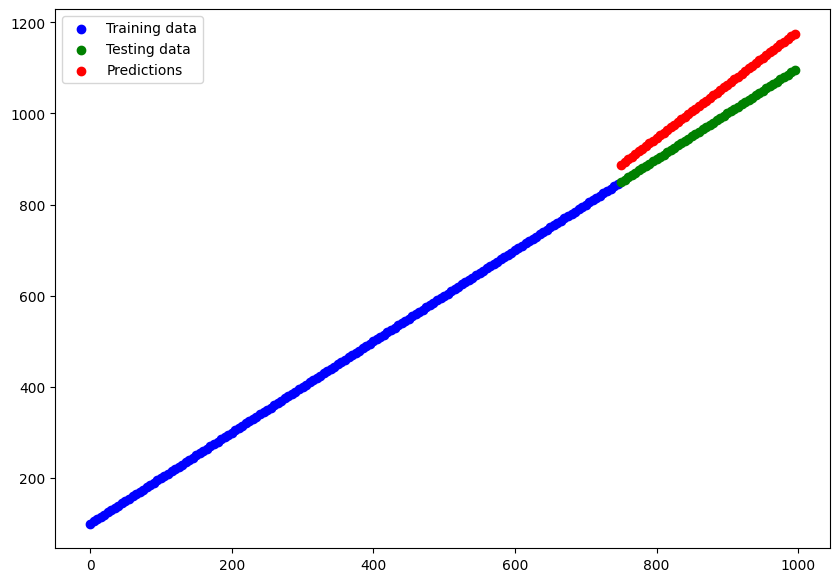

In [34]:
y_reg_preds = model_3.predict(X_reg_test)


plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

In [35]:
# the reason that our code was not working with the classification data was beacuse our model was to trying to find linearity however
# classification datasets are always non linear


# New Concept - Non Linearity


tf.random.set_seed(42)


model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])


model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


hoistory_4 = model_4.fit(X, y, epochs=100, verbose=0)



In [36]:
model_4.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 4.4266 - accuracy: 0.4710


[4.426571369171143, 0.47099998593330383]

313/313 [==============================] - 1s 3ms/step
binary


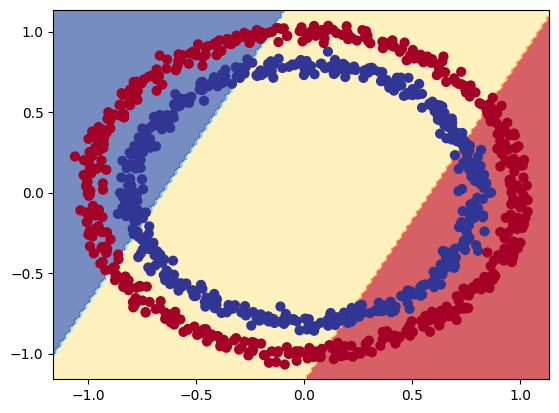

In [37]:
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

In [39]:
# lets start using non linear activation functions


tf.random.set_seed(42)


model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='relu')
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])


history_5 = model_5.fit(X, y, epochs=100, verbose=0)

In [40]:
model_5.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 6.2724 - accuracy: 0.4880


[6.272394180297852, 0.4880000054836273]

In [48]:
# increase layers, increase neurons, change activation to non linear and optimzer to Adam

tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)

])

model_6.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

history_6 = model_6.fit(X, y, epochs=250, verbose=0)

In [49]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9900


[0.05162899196147919, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step
binary


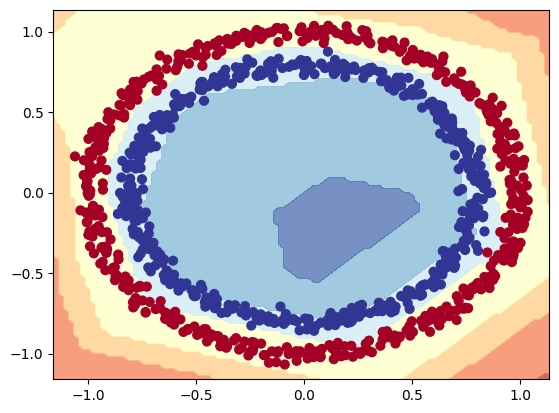

In [51]:
plot_decision_boundary(model=model_6, X=X, y=y)

In [52]:
# lets apply activation function on output layer too


tf.random.set_seed(42)
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

model_7.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

history_7 = model_7.fit(X, y, epochs=100, verbose=0)

In [53]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.1645 - accuracy: 0.9980


[0.16453760862350464, 0.9980000257492065]

313/313 [==============================] - 2s 5ms/step
binary


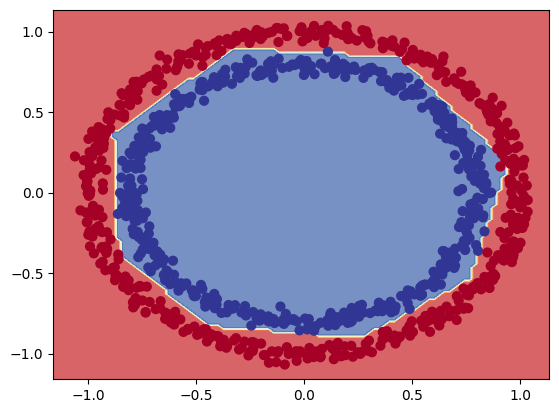

In [54]:
plot_decision_boundary(model=model_7, X=X, y=y)

In [55]:
# evaluating and improving our model